## Contextualization
Roof Imóveis(Fictitious) is one of the largest companies in the Brazilian real estate sector.
and wants to expand its area of operation by making an international investment, with that, she hired you, for a strategic consultancy. <p>
The company will invest in real estate in County County, United States. <p>
Using the available dataset, you will apply the CRISP DM concepts learned so far in a practical project, which seeks to develop your analytical thinking, insights and decision making.

## King County - King Washington County
King County is one of 39 counties in the US state of
Washington. <p>
The county's seat and most populous city is Seattle.
It was founded in 1852. <p>
With over 2.2 million residents, according to the 2020 national census, it is the most populous county in the state and the 12th most populous in the country. <p>
Wikipedia The Dataset presents the sale of properties and their characteristics in the region from May 2014 to May 2015. <p>
It has a total of 21613 records with a total of 21 attributes. <p>

Dataset:
https://www.kaggle.com/harlfoxem/housesalesprediction  <p>
Detailed Dataset:
https://geodacenter.github.io/data <p>
and
lab/KingCounty HouseSales2015/

In [1]:
# Libs for Modeling and Matrices
import numpy as np
import pandas as pd

# Libs for graphical analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Lib to ignore warnings
import warnings

# Disabling warnings
warnings.filterwarnings('ignore')

In [2]:
# Code to import the files
# from google.colab import files 
# upload = files.upload()

## Transforming the date fields of the kc_house_data table

In [3]:
data = pd.read_csv('kc_house_data.csv')
data['date'] = data['date'].apply(lambda x: x.rstrip('T000000'))
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d') 
data['yr_built'] = pd.to_datetime(data['date'], format='%Y%m%d') 
data['yr_renovated'] = pd.to_datetime(data['date'], format='%Y%m%d') 
data.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

    yr_built yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  
0 2014-10-13   2014-10-13   98178  47.5112 -122.257           1340        5650  
1 2014-12-09   2014-12-09   98125  47.7210 -122.319           1690        7639  
2 2015-02-25   2015-02-25   98028  47.7379 -122.233           2720        8062  
3 2014-12-09   2014-12-09   98136  47.5208 -122.393           1360        5000  
4 2015-02-18   2015-02-18   98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

## Read US Zipcode Table for Merge

In [4]:
zips = pd.read_excel('uszips.xlsx')
zips.head()

zip       lat       lng       city state_id   state_name  zcta  \
0  601  18.18027 -66.75266   Adjuntas       PR  Puerto Rico  True   
1  602  18.36075 -67.17541     Aguada       PR  Puerto Rico  True   
2  603  18.45744 -67.12225  Aguadilla       PR  Puerto Rico  True   
3  606  18.16585 -66.93716    Maricao       PR  Puerto Rico  True   
4  610  18.29110 -67.12243     Anasco       PR  Puerto Rico  True   

   parent_zcta  population  density  county_fips county_name  \
0          NaN     16773.0    100.5        72001    Adjuntas   
1          NaN     37083.0    472.1        72003      Aguada   
2          NaN     45652.0    513.2        72005   Aguadilla   
3          NaN      6231.0     54.3        72093     Maricao   
4          NaN     26502.0    275.7        72011      Añasco   

                                      county_weights  \
0                    {"72001": 98.76, "72141": 1.24}   
1                                     {"72003": 100}   
2                    {"72005": 99.76, "72099": 0.24}   
3    {"72093": 82.28, "72153": 11.67, "72121": 6.05}   
4  {"72011": 96.71, "72099": 2.81, "72083": 0.37,...   

                county_names_all          county_fips_all  imprecise  \
0                Adjuntas|Utuado              72001|72141      False   
1                         Aguada                    72003      False   
2                 Aguadilla|Moca              72005|72099      False   
3    Maricao|Yauco|Sabana Grande        72093|72153|72121      False   
4  Añasco|Moca|Las Marías|Aguada  72011|72099|72083|72003      False   

   military             timezone  
0     False  America/Puerto_Rico  
1     False  America/Puerto_Rico  
2     False  America/Puerto_Rico  
3     False  America/Puerto_Rico  
4     False  America/Puerto_Rico

## Calculation of the Price by Area of each Property

In [5]:
data['sqft_price'] = data['price']/data['sqft_living']
data

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0          5650     1.0           0     0  ...        1180              0   
1          7242     2.0           0     0  ...        2170            400   
2         10000     1.0           0     0  ...         770              0   
3          5000     1.0           0     0  ...        1050            910   
4          8080     1.0           0     0  ...        1680              0   
...         ...     ...         ...   ...  ...         ...            ...   
21608      1131     3.0           0     0  ...        1530              0   
21609      5813     2.0           0     0  ...        2310              0   
21610      1350     2.0           0     0  ...        1020              0   
21611      2388     2.0           0     0  ...        1600              0   
21612      1076     2.0           0     0  ...        1020              0   

        yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
0     2014-10-13    2014-10-13   98178  47.5112 -122.257           1340   
1     2014-12-09    2014-12-09   98125  47.7210 -122.319           1690   
2     2015-02-25    2015-02-25   98028  47.7379 -122.233           2720   
3     2014-12-09    2014-12-09   98136  47.5208 -122.393           1360   
4     2015-02-18    2015-02-18   98074  47.6168 -122.045           1800   
...          ...           ...     ...      ...      ...            ...   
21608 2014-05-21    2014-05-21   98103  47.6993 -122.346           1530   
21609 2015-02-23    2015-02-23   98146  47.5107 -122.362           1830   
21610 2014-06-23    2014-06-23   98144  47.5944 -122.299           1020   
21611 2015-01-16    2015-01-16   98027  47.5345 -122.069           1410   
21612 2014-10-15    2014-10-15   98144  47.5941 -122.299           1020   

       sqft_lot15  sqft_price  
0            5650  188.050847  
1            7639  209.338521  
2            8062  233.766234  
3            5000  308.163265  
4            7503  303.571429  
...           ...         ...  
21608        1509  235.294118  
21609        7200  173.160173  
21610        2007  394.216667  
21611        1287  250.000000  
21612        1357  318.627451  

[21613 rows x 22 columns]

## Renamed zip column to zipcode in zip table for future merge

In [6]:
zips.rename(columns = {'zip':'zipcode'}, inplace = True)
zips

zipcode       lat        lng         city state_id   state_name  zcta  \
0          601  18.18027  -66.75266     Adjuntas       PR  Puerto Rico  True   
1          602  18.36075  -67.17541       Aguada       PR  Puerto Rico  True   
2          603  18.45744  -67.12225    Aguadilla       PR  Puerto Rico  True   
3          606  18.16585  -66.93716      Maricao       PR  Puerto Rico  True   
4          610  18.29110  -67.12243       Anasco       PR  Puerto Rico  True   
...        ...       ...        ...          ...      ...          ...   ...   
33783    99923  55.98043 -130.03803        Hyder       AK       Alaska  True   
33784    99925  55.55398 -132.96276      Klawock       AK       Alaska  True   
33785    99926  55.12617 -131.48928   Metlakatla       AK       Alaska  True   
33786    99927  56.33305 -133.60044  Point Baker       AK       Alaska  True   
33787    99929  56.36089 -132.00635     Wrangell       AK       Alaska  True   

       parent_zcta  population  density  county_fips            county_name  \
0              NaN     16773.0    100.5        72001               Adjuntas   
1              NaN     37083.0    472.1        72003                 Aguada   
2              NaN     45652.0    513.2        72005              Aguadilla   
3              NaN      6231.0     54.3        72093                Maricao   
4              NaN     26502.0    275.7        72011                 Añasco   
...            ...         ...      ...          ...                    ...   
33783          NaN        12.0      0.3         2198  Prince of Wales-Hyder   
33784          NaN       990.0      7.1         2198  Prince of Wales-Hyder   
33785          NaN      1582.0      4.6         2198  Prince of Wales-Hyder   
33786          NaN         0.0      0.0         2198  Prince of Wales-Hyder   
33787          NaN      2509.0      0.4         2275               Wrangell   

                                          county_weights  \
0                        {"72001": 98.76, "72141": 1.24}   
1                                         {"72003": 100}   
2                        {"72005": 99.76, "72099": 0.24}   
3        {"72093": 82.28, "72153": 11.67, "72121": 6.05}   
4      {"72011": 96.71, "72099": 2.81, "72083": 0.37,...   
...                                                  ...   
33783                                     {"02198": 100}   
33784                                     {"02198": 100}   
33785                                     {"02198": 100}   
33786                                     {"02198": 100}   
33787                                     {"02275": 100}   

                    county_names_all          county_fips_all  imprecise  \
0                    Adjuntas|Utuado              72001|72141      False   
1                             Aguada                    72003      False   
2                     Aguadilla|Moca              72005|72099      False   
3        Maricao|Yauco|Sabana Grande        72093|72153|72121      False   
4      Añasco|Moca|Las Marías|Aguada  72011|72099|72083|72003      False   
...                              ...                      ...        ...   
33783          Prince of Wales-Hyder                     2198      False   
33784          Prince of Wales-Hyder                     2198      False   
33785          Prince of Wales-Hyder                     2198      False   
33786          Prince of Wales-Hyder                     2198      False   
33787                       Wrangell                     2275      False   

       military             timezone  
0         False  America/Puerto_Rico  
1         False  America/Puerto_Rico  
2         False  America/Puerto_Rico  
3         False  America/Puerto_Rico  
4         False  America/Puerto_Rico  
...         ...                  ...  
33783     False        America/Sitka  
33784     False        America/Sitka  
33785     False   America/Metlakatla  
33786     False        America/Sitka  
33787     False        America/Sit

## Excluded columns that will not be used in the merge between kc_house_data and zips

In [7]:
zips.drop(['lat','lng','zcta','parent_zcta','population','density'	,'county_fips',		'county_names_all','county_fips_all','imprecise','military','timezone','county_weights'], axis=1, inplace=True)
zips

zipcode         city state_id   state_name            county_name
0          601     Adjuntas       PR  Puerto Rico               Adjuntas
1          602       Aguada       PR  Puerto Rico                 Aguada
2          603    Aguadilla       PR  Puerto Rico              Aguadilla
3          606      Maricao       PR  Puerto Rico                Maricao
4          610       Anasco       PR  Puerto Rico                 Añasco
...        ...          ...      ...          ...                    ...
33783    99923        Hyder       AK       Alaska  Prince of Wales-Hyder
33784    99925      Klawock       AK       Alaska  Prince of Wales-Hyder
33785    99926   Metlakatla       AK       Alaska  Prince of Wales-Hyder
33786    99927  Point Baker       AK       Alaska  Prince of Wales-Hyder
33787    99929     Wrangell       AK       Alaska               Wrangell

[33788 rows x 5 columns]

## Creating a table that brings the city of each property

In [8]:
data_merged = pd.merge(data, zips, on = 'zipcode', how = 'left')
data_merged

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0          5650     1.0           0     0  ...    98178  47.5112 -122.257   
1          7242     2.0           0     0  ...    98125  47.7210 -122.319   
2         10000     1.0           0     0  ...    98028  47.7379 -122.233   
3          5000     1.0           0     0  ...    98136  47.5208 -122.393   
4          8080     1.0           0     0  ...    98074  47.6168 -122.045   
...         ...     ...         ...   ...  ...      ...      ...      ...   
21608      1131     3.0           0     0  ...    98103  47.6993 -122.346   
21609      5813     2.0           0     0  ...    98146  47.5107 -122.362   
21610      1350     2.0           0     0  ...    98144  47.5944 -122.299   
21611      2388     2.0           0     0  ...    98027  47.5345 -122.069   
21612      1076     2.0           0     0  ...    98144  47.5941 -122.299   

       sqft_living15 sqft_lot15  sqft_price       city  state_id  state_name  \
0               1340       5650  188.050847    Seattle        WA  Washington   
1               1690       7639  209.338521    Seattle        WA  Washington   
2               2720       8062  233.766234    Kenmore        WA  Washington   
3               1360       5000  308.163265    Seattle        WA  Washington   
4               1800       7503  303.571429  Sammamish        WA  Washington   
...              ...        ...         ...        ...       ...         ...   
21608           1530       1509  235.294118    Seattle        WA  Washington   
21609           1830       7200  173.160173    Seattle        WA  Washington   
21610           1020       2007  394.216667    Seattle        WA  Washington   
21611           1410       1287  250.000000   Issaquah        WA  Washington   
21612           1020       1357  318.627451    Seattle        WA  Washington   

       county_name  
0             King  
1             King  
2             King  
3             King  
4             King  
...            ...  
21608         King  
21609         King  
21610         King  
21611         King  
21612         King  

[21613 rows x 26 columns]

## Calculating the average price graph by area by city from the database

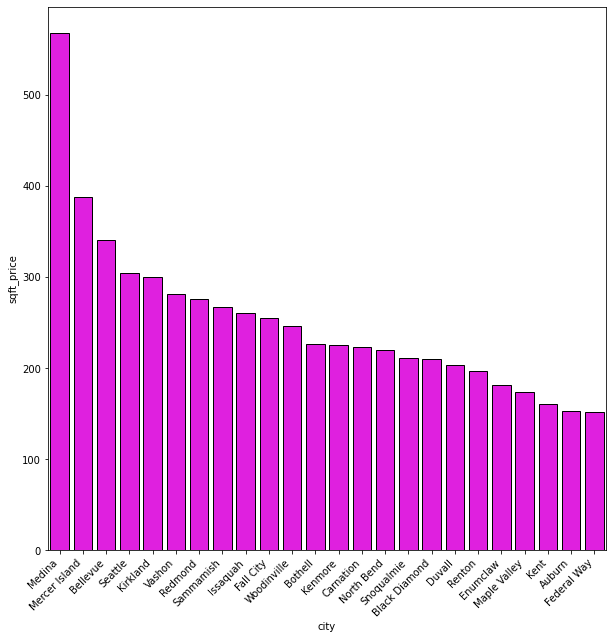

In [9]:
sqft_pricepercity = pd.DataFrame(data_merged.groupby(by ='city')['sqft_price'].mean())
sqft_pricepercity.reset_index(inplace = True)
sqft_pricepercity
plt.figure(figsize=(10,10))
sns.barplot(data = sqft_pricepercity, x = 'city', y='sqft_price', order = sqft_pricepercity.sort_values('sqft_price', ascending=False).city, color = 'magenta', edgecolor = 'black')
plt.xticks(rotation=45, ha='right')
plt.show()


## Describe to understand the data

In [10]:
data_merged.describe(include = 'all')

id                 date         price      bedrooms  \
count   2.161300e+04                21613  2.161300e+04  21613.000000   
unique           NaN                  339           NaN           NaN   
top              NaN  2014-07-01 00:00:00           NaN           NaN   
freq             NaN                  205           NaN           NaN   
first            NaN  2014-05-01 00:00:00           NaN           NaN   
last             NaN  2015-05-27 00:00:00           NaN           NaN   
mean    4.580302e+09                  NaN  5.400881e+05      3.370842   
std     2.876566e+09                  NaN  3.671272e+05      0.930062   
min     1.000102e+06                  NaN  7.500000e+04      0.000000   
25%     2.123049e+09                  NaN  3.219500e+05      3.000000   
50%     3.904930e+09                  NaN  4.500000e+05      3.000000   
75%     7.308900e+09                  NaN  6.450000e+05      4.000000   
max     9.900000e+09                  NaN  7.700000e+06     33.000000   

           bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count   21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean        2.114757   2079.899736  1.510697e+04      1.494309      0.007542   
std         0.770163    918.440897  4.142051e+04      0.539989      0.086517   
min         0.000000    290.000000  5.200000e+02      1.000000      0.000000   
25%         1.750000   1427.000000  5.040000e+03      1.000000      0.000000   
50%         2.250000   1910.000000  7.618000e+03      1.500000      0.000000   
75%         2.500000   2550.000000  1.068800e+04      2.000000      0.000000   
max         8.000000  13540.000000  1.651359e+06      3.500000      1.000000   

                view  ...       zipcode           lat          long  \
count   21613.000000  ...  21613.000000  21613.000000  21613.000000   
unique           NaN  ...           NaN           NaN           NaN   
top              NaN  ...           NaN           NaN           NaN   
freq             NaN  ...           NaN           NaN           NaN   
first            NaN  ...           NaN           NaN           NaN   
last             NaN  ...           NaN           NaN           NaN   
mean        0.234303  ...  98077.939805     47.560053   -122.213896   
std         0.766318  ...     53.505026      0.138564      0.140828   
min         0.000000  ...  98001.000000     47.155900   -122.519000   
25%         0.000000  ...  98033.000000     47.471000   -122.328000   
50%         0.000000  ...  98065.000000     47.571800   -122.230000   
75%         0.000000  ...  98118.000000     47.678000   -122.125000   
max         4.000000  ...  98199.000000     47.777600   -121.315000   

        sqft_living15     sqft_lot15    sqft_price     city  state_id  \
count    21613.000000   21613.000000  21613.000000    21613     21613   
unique            NaN            NaN           NaN       24         1   
top               NaN            NaN           NaN  Seattle        WA   
freq              NaN            NaN           NaN     8977     21613   
first             NaN            NaN           NaN      NaN       NaN   
last              NaN            NaN           NaN      NaN       NaN   
mean      1986.552492   12768.455652    264.156594      NaN       NaN   
std        685.391304   27304.179631    110.060793      NaN       NaN   
min        399.000000     651.000000     87.588235      NaN       NaN   
25%       1490.000000    5100.000000    182.291667      NaN       NaN   
50%       1840.000000    7620.000000    244.644550      NaN       NaN   
75%

## Creating the View

Text(0, 0.5, 'Frequency')

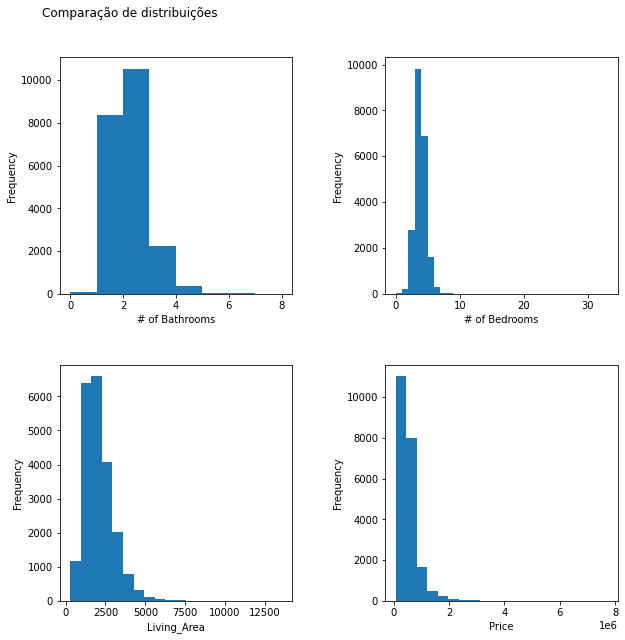

In [11]:
# Create the figure and subplots
fig = plt.figure(figsize = (10,10))
plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
fig.suptitle('Comparação de distribuições', x=0.1, y=.95, horizontalalignment = 'left', verticalalignment = 'top')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Create the histogram plots and adjust the axis names
# Histogram of Sales Quantity by Number of Prices
ax1.hist(x = data_merged['bathrooms'], bins = 8)
ax1.set_xlabel('# of Bathrooms')
ax1.set_ylabel('Frequency')

ax2.hist(x = data_merged['bedrooms'], bins = 33)
ax2.set_xlabel('# of Bedrooms')
ax2.set_ylabel('Frequency')

ax3.hist(x = data_merged['sqft_living'], bins = 20)
ax3.set_xlabel('Living_Area')
ax3.set_ylabel('Frequency')

ax4.hist(x = data_merged['price'], bins = 20)
ax4.set_xlabel('Price')
ax4.set_ylabel('Frequency')

## After analyzing the histograms above, the conditions of the properties that we will analyze for purchase were considered

In [12]:
condicion_1 = (data_merged['bedrooms'] >= 3) & (data_merged['bedrooms'] < 6)
condicion_2 = (data_merged['bathrooms'] >= 2) & (data_merged['bedrooms'] < 4)
condicion_3 = (data_merged['sqft_living'] >= 1750) & (data_merged['sqft_living'] < 2800)
condicion_4 = (data_merged['price'] <= 1000000)

## Creation of a new dataframe, which selects only properties with the conditions declared above

In [13]:
data_filtered_v1 = data_merged[condicion_1 & condicion_2 & condicion_3 & condicion_4]
data_filtered_v1

id       date     price  bedrooms  bathrooms  sqft_living  \
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
9      3793500160 2015-03-12  323000.0         3       2.50         1890   
16     1875500060 2014-07-31  395000.0         3       2.00         1890   
24     3814700200 2014-11-02  329000.0         3       2.25         2450   
30     8562750320 2014-11-01  580500.0         3       2.50         2320   
...           ...        ...       ...       ...        ...          ...   
21580  7853420110 2014-10-03  594866.0         3       3.00         2780   
21581  7853420110 2015-05-04  625000.0         3       3.00         2780   
21585  3832050760 2014-08-28  270000.0         3       2.50         1870   
21589  7570050450 2014-09-01  347500.0         3       2.50         2540   
21603  7852140040 2014-08-25  507250.0         3       2.50         2270   

       sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
1          7242     2.0           0     0  ...    98125  47.7210 -122.319   
9          6560     2.0           0     0  ...    98038  47.3684 -122.031   
16        14040     2.0           0     0  ...    98019  47.7277 -121.962   
24         6500     2.0           0     0  ...    98030  47.3739 -122.172   
30         3980     2.0           0     0  ...    98027  47.5391 -122.070   
...         ...     ...         ...   ...  ...      ...      ...      ...   
21580      6000     2.0           0     0  ...    98065  47.5184 -121.886   
21581      6000     2.0           0     0  ...    98065  47.5184 -121.886   
21585      5000     2.0           0     0  ...    98042  47.3339 -122.055   
21589      4760     2.0           0     0  ...    98038  47.3452 -122.022   
21603      5536     2.0           0     0  ...    98065  47.5389 -121.881   

       sqft_living15 sqft_lot15  sqft_price          city  state_id  \
1               1690       7639  209.338521       Seattle        WA   
9               2390       7570  170.899471  Maple Valley        WA   
16              1890      14018  208.994709        Duvall        WA   
24              2200       6865  134.285714          Kent        WA   
30              2580       3980  250.215517      Issaquah        WA   
...              ...        ...         ...           ...       ...   
21580           2850       6000  213.980576    Snoqualmie        WA   
21581           2850       6000  224.820144    Snoqualmie        WA   
21585           2170       5399  144.385027          Kent        WA   
21589           2540       4571  136.811024  Maple Valley        WA   
21603           2270       5731  223.458150    Snoqualmie        WA   

       state_name  county_name  
1      Washington         King  
9      Washington         King  
16     Washington         King  
24     Washington         King  
30     Washington         King  
...           ...          ...  
21580  Washington         King  
21581  Washington         King  
21585  Washington         King  
21589  Washington         King  
21603  Washington         King  

[2601 rows x 26 columns]

## Visualization of cities from the remaining database to select only cities within a radius of up to 15km from the city of Seattle (assumption defined in the text)

In [14]:
unique_cities = np.sort(pd.unique(data_filtered_v1['city']))
unique_cities

array(['Auburn', 'Bellevue', 'Black Diamond', 'Bothell', 'Carnation',
       'Duvall', 'Enumclaw', 'Fall City', 'Federal Way', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Maple Valley', 'Medina',
       'Mercer Island', 'North Bend', 'Redmond', 'Renton', 'Sammamish',
       'Seattle', 'Snoqualmie', 'Vashon', 'Woodinville'], dtype=object)

## Condition that selects only cities within 15 km of Seattle

In [15]:
condicion_5 = (data_merged['city'] == 'Bellevue') | (data_merged['city'] == 'Kirkland') | (data_merged['city'] == 'Medina') | (data_merged['city'] == 'Mercer Island') | (data_merged['city'] == 'Renton') | (data_merged['city'] == 'Seattle')

## Selecting properties within a predetermined 15 km radius of Seattle

In [16]:
data_filtered_v2 = data_filtered_v1[condicion_5]
data_filtered_v2

id       date     price  bedrooms  bathrooms  sqft_living  \
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
35     9547205180 2014-06-13  696000.0         3       2.50         2300   
60     1516000055 2014-12-01  650000.0         3       2.25         2150   
65     3253500160 2014-11-02  317625.0         3       2.75         2770   
87     3342103156 2014-06-18  461000.0         3       3.25         2770   
...           ...        ...       ...       ...        ...          ...   
21528  3416600750 2015-02-17  585000.0         3       2.50         1750   
21533   524059322 2015-02-26  999999.0         3       2.50         2100   
21549  1220000371 2014-12-31  327500.0         3       2.50         1820   
21554  2855000110 2014-08-08  388000.0         3       2.50         2198   
21558  2255500123 2014-08-02  747450.0         3       2.50         2110   

       sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
1          7242     2.0           0     0  ...    98125  47.7210 -122.319   
35         3060     1.5           0     0  ...    98115  47.6827 -122.310   
60        21235     1.0           0     3  ...    98166  47.4336 -122.339   
65         3809     1.5           0     0  ...    98144  47.5747 -122.304   
87         6278     2.0           0     0  ...    98056  47.5228 -122.199   
...         ...     ...         ...   ...  ...      ...      ...      ...   
21528      1381     3.0           0     0  ...    98122  47.6021 -122.294   
21533      4097     2.0           0     0  ...    98004  47.5983 -122.200   
21549      1866     2.0           0     0  ...    98166  47.4643 -122.346   
21554      6222     2.0           0     2  ...    98198  47.3906 -122.304   
21558      1339     2.0           0     0  ...    98122  47.6088 -122.311   

       sqft_living15 sqft_lot15  sqft_price      city  state_id  state_name  \
1               1690       7639  209.338521   Seattle        WA  Washington   
35              1590       3264  302.608696   Seattle        WA  Washington   
60              2570      18900  302.325581   Seattle        WA  Washington   
65              1440       4000  114.666065   Seattle        WA  Washington   
87              1900       7349  166.425993    Renton        WA  Washington   
...              ...        ...         ...       ...       ...         ...   
21528           1940       4800  334.285714   Seattle        WA  Washington   
21533           1780       4764  476.190000  Bellevue        WA  Washington   
21549           1660       6900  179.945055   Seattle        WA  Washington   
21554           2198       7621  176.524113   Seattle        WA  Washington   
21558           1630       2670  354.241706   Seattle        WA  Washington   

       county_name  
1             King  
35            King  
60            King  
65            King  
87            King  
...            ...  
21528         King  
21533         King  
21549         King  
21554         King  
21558         King  

[1194 rows x 26 columns]

## Viewing all table columns with describe() command

In [17]:
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)
data_filtered_v2.describe(include = 'all')

id                 date           price  bedrooms  \
count   1.194000e+03                 1194     1194.000000    1194.0   
unique           NaN                  263             NaN       NaN   
top              NaN  2014-06-02 00:00:00             NaN       NaN   
freq             NaN                   17             NaN       NaN   
first            NaN  2014-05-02 00:00:00             NaN       NaN   
last             NaN  2015-05-13 00:00:00             NaN       NaN   
mean    4.529802e+09                  NaN   567368.220268       3.0   
std     2.824512e+09                  NaN   180745.897545       0.0   
min     1.120040e+07                  NaN   180000.000000       3.0   
25%     2.249500e+09                  NaN   426250.000000       3.0   
50%     3.798500e+09                  NaN   550000.000000       3.0   
75%     7.196126e+09                  NaN   699000.000000       3.0   
max     9.839300e+09                  NaN  1000000.000000       3.0   

          bathrooms  sqft_living       sqft_lot       floors   waterfront  \
count   1194.000000  1194.000000    1194.000000  1194.000000  1194.000000   
unique          NaN          NaN            NaN          NaN          NaN   
top             NaN          NaN            NaN          NaN          NaN   
freq            NaN          NaN            NaN          NaN          NaN   
first           NaN          NaN            NaN          NaN          NaN   
last            NaN          NaN            NaN          NaN          NaN   
mean       2.437605  2144.829983    8635.014238     1.605109     0.005863   
std        0.369325   284.130565   12666.215603     0.578360     0.076375   
min        2.000000  1750.000000     914.000000     1.000000     0.000000   
25%        2.250000  1890.000000    4080.000000     1.000000     0.000000   
50%        2.500000  2100.000000    6992.500000     1.500000     0.000000   
75%        2.500000  2360.000000    9575.250000     2.000000     0.000000   
max        4.000000  2790.000000  220414.000000     3.500000     1.000000   

               view    condition        grade   sqft_above  sqft_basement  \
count   1194.000000  1194.000000  1194.000000  1194.000000    1194.000000   
unique          NaN          NaN          NaN          NaN            NaN   
top             NaN          NaN          NaN          NaN            NaN   
freq            NaN          NaN          NaN          NaN            NaN   
first           NaN          NaN          NaN          NaN            NaN   
last            NaN          NaN          NaN          NaN            NaN   
mean       0.314908     3.489950     7.836683  1762.612228     382.217755   
std        0.856705     0.702277     0.805031   436.487924     386.390674   
min        0.000000     2.000000     5.000000   810.000000       0.000000   
25%        0.000000     3.000000     7.000000  1410.000000       0.000000   
50%        0.000000     3.000000     8.000000  1770.000000     360.000000   
75%        0.000000     4.000000     8.000000  2060.000000     700.000000   
max        4.000000     5.000000    10.000000  2790.000000    1350.000000   

                   yr_built         yr_renovated       zipcode          lat  \
count                  1194                 1194   1194.000000  1194.000000   
unique                  263                  263           NaN          NaN   
top     2014-06-02 00:00:00  2014-06-02 00:00:00           NaN          NaN   
freq                     17                   17           NaN          NaN   
first   2014-05-02 00:00:00  2014-05-02 00:00:00           NaN          NaN   
last    2015-05-13 00:00:00  2015-05-13 00:00:00           NaN          NaN   
mean                    NaN                  NaN  98094.636516    47.597358   
std                     NaN                  NaN     55.107167     0.099393   
min                     NaN                  NaN  98004.000000    47.344800   
25%                     NaN                  NaN  98055.000000    47.522875

In [18]:
data_filtered_v2.sort_values('grade', ascending = False)

id       date      price  bedrooms  bathrooms  sqft_living  \
10995  2162000260 2014-08-27   699000.0         3       2.50         2740   
863    1937300270 2015-03-03   910000.0         3       3.50         2480   
1601   2125049139 2014-08-06   895000.0         3       2.50         2500   
19868  7518506715 2014-05-06   979000.0         3       2.50         2690   
19865  1772600510 2014-06-02   625000.0         3       2.50         2440   
18848  7631800110 2014-09-18   380000.0         3       2.50         1980   
18248  9388100015 2014-11-19   740000.0         3       2.50         2710   
17952   272000945 2015-03-25   826000.0         3       3.25         2330   
3347    464000600 2014-08-27   641250.0         3       2.50         2220   
3389   1523059066 2015-02-19   895000.0         3       2.00         2160   
17205  4139440480 2014-12-01   796500.0         3       2.75         2590   
17204  4139440480 2014-06-26   695000.0         3       2.75         2590   
17064  3013300660 2014-10-28   550000.0         3       2.25         2090   
16468  4397650080 2014-10-15   815000.0         3       3.75         2780   
4593   1024000100 2015-04-08   900000.0         3       2.50         1920   
5715   4139400280 2014-10-08   765000.0         3       2.50         2700   
5911   1860600840 2014-08-15   925000.0         3       3.00         2560   
6133    923000280 2014-07-22   699000.0         3       2.50         2580   
7385   5039300305 2014-11-07   450000.0         3       2.50         1990   
8646   6133100120 2014-09-23   995000.0         3       2.50         2460   
8741   4139440100 2015-01-28   810000.0         3       2.50         2610   
10237  1277000240 2015-04-02   735000.0         3       2.50         2540   
9527   7785350490 2014-10-23   675000.0         3       2.25         2770   
20453   518500610 2014-06-16   798800.0         3       2.75         2670   
15930  4139400630 2014-05-29   860000.0         3       2.50         2770   
21213   666000143 2014-12-29   785000.0         3       3.00         1950   
15401  3999300290 2014-10-16   850000.0         3       3.50         2620   
14983  6308000010 2015-04-23   585000.0         3       2.50         2290   
15303  7732410420 2014-06-17   809000.0         3       2.50         2590   
15304  7806500290 2014-08-18   535000.0         3       2.50         2790   
15322  3585900305 2014-10-03   999000.0         3       2.50         2710   
5167   6308000020 2015-04-03   590000.0         3       2.50         2290   
5161   7856620050 2015-02-25   822000.0         3       2.00         2410   
5092   2592201350 2015-03-24   823000.0         3       2.50         2560   
14926  9551201155 2014-07-28   925000.0         3       3.25         2610   
15431  7855300460 2014-09-23  1000000.0         3       2.75         2370   
15437  4094800380 2015-04-27   990000.0         3       2.25         2630   
15461  8914100080 2015-03-11   568000.0         3       2.50         2740   
15506  6669070080 2015-04-17   699000.0         3       2.50         2370   
15707  7806450050 2014-10-29   480000.0         3       2.50         2450   
4846   9528100963 2014-08-06   719000.0         3       3.00         1833   
14982  6308000010 2014-12-08   585000.0         3       2.50         2290   
14841  1959700540 2014-11-04   952000.0         3       2.50         2450   
15744  2026059181 2014-11-02   560000.0         3       2.00         2090   
14457  2597520790 2015-04-23   765000.0         3       2.50         2310   
5852   4070700290 2015-02-26   899000.0         3       2.50         1950   
5848   4113800500 2015-02-12   572500.0         3       2.50         2490   
5842   5525400430 2014-07-15   585000.0         3       2.50         2050   
5833   2600000050 2014-08-27   690000.0         3       2.25         2430   
5817   9577800005 2014-10-22   775000.0         3       2.50         2780   
14424  3543900418 2014-05-15   580050.0         3       2.50         2360   
5775    263

## Removing properties with Vista grade 0

In [19]:
condicion_6 = data_filtered_v2['view'] != 0
data_filtered_v3 = data_filtered_v2[condicion_6]
data_filtered_v3

id       date      price  bedrooms  bathrooms  sqft_living  \
60     1516000055 2014-12-01   650000.0         3       2.25         2150   
120    7278700070 2015-01-02   660000.0         3       2.50         2400   
126    4058801670 2014-07-17   445000.0         3       2.25         2100   
294    9297300045 2014-07-09   550000.0         3       2.00         1970   
359     952003285 2014-08-05   679900.0         3       2.50         2440   
953    7517500611 2014-05-21   720000.0         3       2.50         2020   
1073   2485000202 2015-04-01   986000.0         3       2.50         2380   
1207    194000505 2014-09-04   651000.0         3       2.00         1940   
1360   6821600390 2015-01-08   815000.0         3       2.00         2310   
1437   4473400045 2014-08-26   535000.0         3       2.00         2040   
1531   2864600105 2014-06-24   819000.0         3       3.50         2130   
1755   7784400060 2015-01-02   545000.0         3       2.50         2370   
1888   9253900354 2014-07-01   580000.0         3       2.50         2200   
2130   2483200060 2014-06-12   678500.0         3       2.00         2460   
2528   4477000270 2014-08-22   565000.0         3       2.00         2730   
2662   7272001805 2015-03-09   418200.0         3       2.25         2240   
2728   3760500435 2015-01-14   570000.0         3       2.75         2730   
2768   3756100160 2014-09-23   678000.0         3       2.75         2770   
2907   1455600015 2014-12-12   760000.0         3       3.50         2350   
3131   9829200590 2014-10-28   759000.0         3       2.75         1960   
3160   2759800110 2014-10-31   485000.0         3       2.50         1840   
3170   6117500785 2014-07-22   590000.0         3       2.25         2300   
3272   3625059143 2014-09-03   600000.0         3       2.25         2100   
3347    464000600 2014-08-27   641250.0         3       2.50         2220   
3562   3342700371 2014-06-09   539950.0         3       2.25         2190   
3604   2141310490 2015-01-02   625000.0         3       2.25         1920   
3676   2391600165 2014-06-17   475000.0         3       2.25         2280   
3771   3222049112 2015-05-07   449900.0         3       2.50         2780   
3824   2249500367 2014-10-21   736000.0         3       2.50         1980   
3965   8815400735 2014-05-29   680000.0         3       2.25         2330   
4061   8965500900 2015-02-13   725000.0         3       2.50         2090   
4186   8073000265 2014-09-18   360000.0         3       2.00         1960   
4315   1376800025 2014-09-08   834500.0         3       2.25         2780   
4429   2011400583 2014-06-06   402000.0         3       2.50         2700   
4576   7203600750 2015-04-27   421000.0         3       2.50         1930   
4593   1024000100 2015-04-08   900000.0         3       2.50         1920   
4793   3948900050 2015-04-27   616000.0         3       3.25         2130   
5125   3741600020 2014-09-15   540000.0         3       2.25         2100   
5180   9285800275 2014-08-14   835000.0         3       2.25         2520   
5203   7649400170 2014-12-05   675000.0         3       2.25         2070   
5565   4019301300 2014-12-23   472000.0         3       2.00         2200   
5664    139000185 2015-04-28   800000.0         3       2.50         2100   
5714   9297300255 2014-07-16   565000.0         3       3.00         2110   
5817   9577800005 2014-10-22   775000.0         3       2.50         2780   
5830   1250203860 2014-10-03   759000.0         3       2.00         2260   
6409   2815600305 2015-04-22   695000.0         3       2.00         2560   
6558     56000095 2014-06-26   805000.0         3       2.75         2600   
6872   7558300170 2014-12-12   439000.0         3       2.25         1830   
6887   7129301578 2014-05-21   495000.0         3       3.50         2380   
6946   7997200130 2015-01-28   649950.0         3       2.50         2420   
6951   3123049142 2014-08-05   452000.0         3       2.25         2600   
6986   3342

## Averaging the view, condition, grade and price by area

In [20]:
data_filtered_v3['view_average'] = data_filtered_v3['view'].mean()
data_filtered_v3['condition_average'] = data_filtered_v3['condition'].mean()
data_filtered_v3['grade_average'] = data_filtered_v3['grade'].mean()
data_filtered_v3['sqft_price_average'] = data_filtered_v3['sqft_price'].mean()

data_filtered_v3

id       date      price  bedrooms  bathrooms  sqft_living  \
60     1516000055 2014-12-01   650000.0         3       2.25         2150   
120    7278700070 2015-01-02   660000.0         3       2.50         2400   
126    4058801670 2014-07-17   445000.0         3       2.25         2100   
294    9297300045 2014-07-09   550000.0         3       2.00         1970   
359     952003285 2014-08-05   679900.0         3       2.50         2440   
953    7517500611 2014-05-21   720000.0         3       2.50         2020   
1073   2485000202 2015-04-01   986000.0         3       2.50         2380   
1207    194000505 2014-09-04   651000.0         3       2.00         1940   
1360   6821600390 2015-01-08   815000.0         3       2.00         2310   
1437   4473400045 2014-08-26   535000.0         3       2.00         2040   
1531   2864600105 2014-06-24   819000.0         3       3.50         2130   
1755   7784400060 2015-01-02   545000.0         3       2.50         2370   
1888   9253900354 2014-07-01   580000.0         3       2.50         2200   
2130   2483200060 2014-06-12   678500.0         3       2.00         2460   
2528   4477000270 2014-08-22   565000.0         3       2.00         2730   
2662   7272001805 2015-03-09   418200.0         3       2.25         2240   
2728   3760500435 2015-01-14   570000.0         3       2.75         2730   
2768   3756100160 2014-09-23   678000.0         3       2.75         2770   
2907   1455600015 2014-12-12   760000.0         3       3.50         2350   
3131   9829200590 2014-10-28   759000.0         3       2.75         1960   
3160   2759800110 2014-10-31   485000.0         3       2.50         1840   
3170   6117500785 2014-07-22   590000.0         3       2.25         2300   
3272   3625059143 2014-09-03   600000.0         3       2.25         2100   
3347    464000600 2014-08-27   641250.0         3       2.50         2220   
3562   3342700371 2014-06-09   539950.0         3       2.25         2190   
3604   2141310490 2015-01-02   625000.0         3       2.25         1920   
3676   2391600165 2014-06-17   475000.0         3       2.25         2280   
3771   3222049112 2015-05-07   449900.0         3       2.50         2780   
3824   2249500367 2014-10-21   736000.0         3       2.50         1980   
3965   8815400735 2014-05-29   680000.0         3       2.25         2330   
4061   8965500900 2015-02-13   725000.0         3       2.50         2090   
4186   8073000265 2014-09-18   360000.0         3       2.00         1960   
4315   1376800025 2014-09-08   834500.0         3       2.25         2780   
4429   2011400583 2014-06-06   402000.0         3       2.50         2700   
4576   7203600750 2015-04-27   421000.0         3       2.50         1930   
4593   1024000100 2015-04-08   900000.0         3       2.50         1920   
4793   3948900050 2015-04-27   616000.0         3       3.25         2130   
5125   3741600020 2014-09-15   540000.0         3       2.25         2100   
5180   9285800275 2014-08-14   835000.0         3       2.25         2520   
5203   7649400170 2014-12-05   675000.0         3       2.25         2070   
5565   4019301300 2014-12-23   472000.0         3       2.00         2200   
5664    139000185 2015-04-28   800000.0         3       2.50         2100   
5714   9297300255 2014-07-16   565000.0         3       3.00         2110   
5817   9577800005 2014-10-22   775000.0         3       2.50         2780   
5830   1250203860 2014-10-03   759000.0         3       2.00         2260   
6409   2815600305 2015-04-22   695000.0         3       2.00         2560   
6558     56000095 2014-06-26   805000.0         3       2.75         2600   
6872   7558300170 2014-12-12   439000.0         3       2.25         1830   
6887   7129301578 2014-05-21   495000.0         3       3.50         2380   
6946   7997200130 2015-01-28   649950.0         3       2.50         2420   
6951   3123049142 2014-08-05   452000.0         3       2.25         2600   
6986   3342

## Calculating standard deviations of view, condition, grade and price by area

In [21]:
data_filtered_v3['view_std'] = data_filtered_v3['view'].std()
data_filtered_v3['condition_std'] = data_filtered_v3['condition'].std()
data_filtered_v3['grade_std'] = data_filtered_v3['grade'].std()
data_filtered_v3['sqft_price_std'] = data_filtered_v3['sqft_price'].std()

data_filtered_v3

id       date      price  bedrooms  bathrooms  sqft_living  \
60     1516000055 2014-12-01   650000.0         3       2.25         2150   
120    7278700070 2015-01-02   660000.0         3       2.50         2400   
126    4058801670 2014-07-17   445000.0         3       2.25         2100   
294    9297300045 2014-07-09   550000.0         3       2.00         1970   
359     952003285 2014-08-05   679900.0         3       2.50         2440   
953    7517500611 2014-05-21   720000.0         3       2.50         2020   
1073   2485000202 2015-04-01   986000.0         3       2.50         2380   
1207    194000505 2014-09-04   651000.0         3       2.00         1940   
1360   6821600390 2015-01-08   815000.0         3       2.00         2310   
1437   4473400045 2014-08-26   535000.0         3       2.00         2040   
1531   2864600105 2014-06-24   819000.0         3       3.50         2130   
1755   7784400060 2015-01-02   545000.0         3       2.50         2370   
1888   9253900354 2014-07-01   580000.0         3       2.50         2200   
2130   2483200060 2014-06-12   678500.0         3       2.00         2460   
2528   4477000270 2014-08-22   565000.0         3       2.00         2730   
2662   7272001805 2015-03-09   418200.0         3       2.25         2240   
2728   3760500435 2015-01-14   570000.0         3       2.75         2730   
2768   3756100160 2014-09-23   678000.0         3       2.75         2770   
2907   1455600015 2014-12-12   760000.0         3       3.50         2350   
3131   9829200590 2014-10-28   759000.0         3       2.75         1960   
3160   2759800110 2014-10-31   485000.0         3       2.50         1840   
3170   6117500785 2014-07-22   590000.0         3       2.25         2300   
3272   3625059143 2014-09-03   600000.0         3       2.25         2100   
3347    464000600 2014-08-27   641250.0         3       2.50         2220   
3562   3342700371 2014-06-09   539950.0         3       2.25         2190   
3604   2141310490 2015-01-02   625000.0         3       2.25         1920   
3676   2391600165 2014-06-17   475000.0         3       2.25         2280   
3771   3222049112 2015-05-07   449900.0         3       2.50         2780   
3824   2249500367 2014-10-21   736000.0         3       2.50         1980   
3965   8815400735 2014-05-29   680000.0         3       2.25         2330   
4061   8965500900 2015-02-13   725000.0         3       2.50         2090   
4186   8073000265 2014-09-18   360000.0         3       2.00         1960   
4315   1376800025 2014-09-08   834500.0         3       2.25         2780   
4429   2011400583 2014-06-06   402000.0         3       2.50         2700   
4576   7203600750 2015-04-27   421000.0         3       2.50         1930   
4593   1024000100 2015-04-08   900000.0         3       2.50         1920   
4793   3948900050 2015-04-27   616000.0         3       3.25         2130   
5125   3741600020 2014-09-15   540000.0         3       2.25         2100   
5180   9285800275 2014-08-14   835000.0         3       2.25         2520   
5203   7649400170 2014-12-05   675000.0         3       2.25         2070   
5565   4019301300 2014-12-23   472000.0         3       2.00         2200   
5664    139000185 2015-04-28   800000.0         3       2.50         2100   
5714   9297300255 2014-07-16   565000.0         3       3.00         2110   
5817   9577800005 2014-10-22   775000.0         3       2.50         2780   
5830   1250203860 2014-10-03   759000.0         3       2.00         2260   
6409   2815600305 2015-04-22   695000.0         3       2.00         2560   
6558     56000095 2014-06-26   805000.0         3       2.75         2600   
6872   7558300170 2014-12-12   439000.0         3       2.25         1830   
6887   7129301578 2014-05-21   495000.0         3       3.50         2380   
6946   7997200130 2015-01-28   649950.0         3       2.50         2420   
6951   3123049142 2014-08-05   452000.0         3       2.25         2600   
6986   3342

## Calculating the z-score of the view, condition, grade and price per area of each property

In [22]:
data_filtered_v3['view_zscore'] = (data_filtered_v3['view'] - data_filtered_v3['view_average'])/data_filtered_v3['view_std']
data_filtered_v3['condition_zscore'] = (data_filtered_v3['condition'] - data_filtered_v3['condition_average'])/data_filtered_v3['condition_std']
data_filtered_v3['grade_zscore'] = (data_filtered_v3['grade'] - data_filtered_v3['grade_average'])/data_filtered_v3['grade_std']
data_filtered_v3['sqft_price_zscore'] = (data_filtered_v3['sqft_price'] - data_filtered_v3['sqft_price_average'])/data_filtered_v3['sqft_price_std']

data_filtered_v3

id       date      price  bedrooms  bathrooms  sqft_living  \
60     1516000055 2014-12-01   650000.0         3       2.25         2150   
120    7278700070 2015-01-02   660000.0         3       2.50         2400   
126    4058801670 2014-07-17   445000.0         3       2.25         2100   
294    9297300045 2014-07-09   550000.0         3       2.00         1970   
359     952003285 2014-08-05   679900.0         3       2.50         2440   
953    7517500611 2014-05-21   720000.0         3       2.50         2020   
1073   2485000202 2015-04-01   986000.0         3       2.50         2380   
1207    194000505 2014-09-04   651000.0         3       2.00         1940   
1360   6821600390 2015-01-08   815000.0         3       2.00         2310   
1437   4473400045 2014-08-26   535000.0         3       2.00         2040   
1531   2864600105 2014-06-24   819000.0         3       3.50         2130   
1755   7784400060 2015-01-02   545000.0         3       2.50         2370   
1888   9253900354 2014-07-01   580000.0         3       2.50         2200   
2130   2483200060 2014-06-12   678500.0         3       2.00         2460   
2528   4477000270 2014-08-22   565000.0         3       2.00         2730   
2662   7272001805 2015-03-09   418200.0         3       2.25         2240   
2728   3760500435 2015-01-14   570000.0         3       2.75         2730   
2768   3756100160 2014-09-23   678000.0         3       2.75         2770   
2907   1455600015 2014-12-12   760000.0         3       3.50         2350   
3131   9829200590 2014-10-28   759000.0         3       2.75         1960   
3160   2759800110 2014-10-31   485000.0         3       2.50         1840   
3170   6117500785 2014-07-22   590000.0         3       2.25         2300   
3272   3625059143 2014-09-03   600000.0         3       2.25         2100   
3347    464000600 2014-08-27   641250.0         3       2.50         2220   
3562   3342700371 2014-06-09   539950.0         3       2.25         2190   
3604   2141310490 2015-01-02   625000.0         3       2.25         1920   
3676   2391600165 2014-06-17   475000.0         3       2.25         2280   
3771   3222049112 2015-05-07   449900.0         3       2.50         2780   
3824   2249500367 2014-10-21   736000.0         3       2.50         1980   
3965   8815400735 2014-05-29   680000.0         3       2.25         2330   
4061   8965500900 2015-02-13   725000.0         3       2.50         2090   
4186   8073000265 2014-09-18   360000.0         3       2.00         1960   
4315   1376800025 2014-09-08   834500.0         3       2.25         2780   
4429   2011400583 2014-06-06   402000.0         3       2.50         2700   
4576   7203600750 2015-04-27   421000.0         3       2.50         1930   
4593   1024000100 2015-04-08   900000.0         3       2.50         1920   
4793   3948900050 2015-04-27   616000.0         3       3.25         2130   
5125   3741600020 2014-09-15   540000.0         3       2.25         2100   
5180   9285800275 2014-08-14   835000.0         3       2.25         2520   
5203   7649400170 2014-12-05   675000.0         3       2.25         2070   
5565   4019301300 2014-12-23   472000.0         3       2.00         2200   
5664    139000185 2015-04-28   800000.0         3       2.50         2100   
5714   9297300255 2014-07-16   565000.0         3       3.00         2110   
5817   9577800005 2014-10-22   775000.0         3       2.50         2780   
5830   1250203860 2014-10-03   759000.0         3       2.00         2260   
6409   2815600305 2015-04-22   695000.0         3       2.00         2560   
6558     56000095 2014-06-26   805000.0         3       2.75         2600   
6872   7558300170 2014-12-12   439000.0         3       2.25         1830   
6887   7129301578 2014-05-21   495000.0         3       3.50         2380   
6946   7997200130 2015-01-28   649950.0         3       2.50         2420   
6951   3123049142 2014-08-05   452000.0         3       2.25         2600   
6986   3342

## Summing the qualitative z-scores and ordering them

In [23]:
data_filtered_v3['quality_zscore'] = data_filtered_v3['view_zscore'] + data_filtered_v3['condition_zscore'] + data_filtered_v3['grade_zscore']
data_filtered_v3.sort_values('quality_zscore', ascending = False)

id       date      price  bedrooms  bathrooms  sqft_living  \
15401  3999300290 2014-10-16   850000.0         3       3.50         2620   
11844  2623039082 2015-02-18   770000.0         3       3.50         2050   
15431  7855300460 2014-09-23  1000000.0         3       2.75         2370   
18848  7631800110 2014-09-18   380000.0         3       2.50         1980   
12297  3224500240 2014-06-17   950000.0         3       2.75         2750   
294    9297300045 2014-07-09   550000.0         3       2.00         1970   
15734  6758700050 2015-04-01   812000.0         3       2.00         1970   
10382   579002220 2014-08-27   808000.0         3       2.50         2550   
4315   1376800025 2014-09-08   834500.0         3       2.25         2780   
12901  9808630120 2015-01-08   770000.0         3       2.50         2190   
11028  7922900030 2014-10-03   851000.0         3       2.75         2660   
12935  3222049044 2014-06-12   835000.0         3       3.00         2790   
13348  9285800330 2014-07-02   732000.0         3       3.75         2670   
9195   7935000625 2015-04-09   975000.0         3       2.50         2530   
15322  3585900305 2014-10-03   999000.0         3       2.50         2710   
19971  2623039019 2014-05-08   988500.0         3       2.75         2015   
8196   6908200650 2014-05-27   732000.0         3       2.50         2330   
8586   4055701110 2014-06-12   795000.0         3       2.00         2420   
10995  2162000260 2014-08-27   699000.0         3       2.50         2740   
15900  1193000280 2014-05-27   994000.0         3       2.25         2510   
18651  2024059059 2014-10-01   693000.0         3       2.25         2090   
6558     56000095 2014-06-26   805000.0         3       2.75         2600   
10252  3342100160 2014-10-09   510000.0         3       3.00         1845   
3131   9829200590 2014-10-28   759000.0         3       2.75         1960   
5180   9285800275 2014-08-14   835000.0         3       2.25         2520   
11269  6909700340 2014-08-02   619000.0         3       2.00         1990   
1531   2864600105 2014-06-24   819000.0         3       3.50         2130   
16222  2045800006 2014-09-04   439000.0         3       2.25         2230   
13648  5072200040 2014-05-02   403000.0         3       2.00         1960   
11057   868000575 2014-08-19   998800.0         3       2.00         2250   
13513  9808640040 2015-03-06   850000.0         3       2.50         2340   
1073   2485000202 2015-04-01   986000.0         3       2.50         2380   
3347    464000600 2014-08-27   641250.0         3       2.50         2220   
18248  9388100015 2014-11-19   740000.0         3       2.50         2710   
17064  3013300660 2014-10-28   550000.0         3       2.25         2090   
4593   1024000100 2015-04-08   900000.0         3       2.50         1920   
17952   272000945 2015-03-25   826000.0         3       3.25         2330   
17287  1250201640 2014-05-07   775000.0         3       2.00         2540   
60     1516000055 2014-12-01   650000.0         3       2.25         2150   
18666  4073200757 2014-12-31   690000.0         3       2.00         1890   
18097  1455600062 2014-10-21   689000.0         3       2.50         2080   
1755   7784400060 2015-01-02   545000.0         3       2.50         2370   
20457  3342100569 2014-08-13   950000.0         3       2.50         2700   
16438  1102000759 2014-10-26   755000.0         3       2.50         2420   
2528   4477000270 2014-08-22   565000.0         3       2.00         2730   
18844  3303900090 2014-10-23   898000.0         3       2.25         2650   
8504   7987401095 2014-11-13   549950.0         3       2.50         2380   
14424  3543900418 2014-05-15   580050.0         3       2.50         2360   
17376  4154305575 2014-09-03   836500.0         3       2.50         2230   
14582  7203600530 2014-05-29   525000.0         3       3.00         2600   
15081  7935000595 2014-10-08   939000.0         3       3.50         2450   
9277   8129

## Calculating the difference between the z-scores and ordering them from highest to lowest

In [24]:
data_filtered_v3['zscore_delta'] = data_filtered_v3['quality_zscore'] - data_filtered_v3['sqft_price_zscore']
data_filtered_v3.sort_values('zscore_delta', ascending = False)


id       date      price  bedrooms  bathrooms  sqft_living  \
18848  7631800110 2014-09-18   380000.0         3       2.50         1980   
15401  3999300290 2014-10-16   850000.0         3       3.50         2620   
294    9297300045 2014-07-09   550000.0         3       2.00         1970   
16222  2045800006 2014-09-04   439000.0         3       2.25         2230   
13648  5072200040 2014-05-02   403000.0         3       2.00         1960   
13348  9285800330 2014-07-02   732000.0         3       3.75         2670   
11844  2623039082 2015-02-18   770000.0         3       3.50         2050   
4315   1376800025 2014-09-08   834500.0         3       2.25         2780   
14582  7203600530 2014-05-29   525000.0         3       3.00         2600   
2528   4477000270 2014-08-22   565000.0         3       2.00         2730   
10382   579002220 2014-08-27   808000.0         3       2.50         2550   
12935  3222049044 2014-06-12   835000.0         3       3.00         2790   
17474  6329000185 2015-03-29   540000.0         3       2.50         2600   
1755   7784400060 2015-01-02   545000.0         3       2.50         2370   
10995  2162000260 2014-08-27   699000.0         3       2.50         2740   
12297  3224500240 2014-06-17   950000.0         3       2.75         2750   
17431  5592900020 2014-12-02   410000.0         3       3.25         2650   
11028  7922900030 2014-10-03   851000.0         3       2.75         2660   
8504   7987401095 2014-11-13   549950.0         3       2.50         2380   
8196   6908200650 2014-05-27   732000.0         3       2.50         2330   
4429   2011400583 2014-06-06   402000.0         3       2.50         2700   
15431  7855300460 2014-09-23  1000000.0         3       2.75         2370   
15554  7893800250 2015-04-03   348000.0         3       2.50         2370   
14424  3543900418 2014-05-15   580050.0         3       2.50         2360   
6951   3123049142 2014-08-05   452000.0         3       2.25         2600   
11556  2013802030 2014-09-11   357000.0         3       2.00         2460   
10252  3342100160 2014-10-09   510000.0         3       3.00         1845   
12901  9808630120 2015-01-08   770000.0         3       2.50         2190   
17064  3013300660 2014-10-28   550000.0         3       2.25         2090   
18248  9388100015 2014-11-19   740000.0         3       2.50         2710   
5125   3741600020 2014-09-15   540000.0         3       2.25         2100   
3347    464000600 2014-08-27   641250.0         3       2.50         2220   
6558     56000095 2014-06-26   805000.0         3       2.75         2600   
11269  6909700340 2014-08-02   619000.0         3       2.00         1990   
15322  3585900305 2014-10-03   999000.0         3       2.50         2710   
8586   4055701110 2014-06-12   795000.0         3       2.00         2420   
60     1516000055 2014-12-01   650000.0         3       2.25         2150   
17287  1250201640 2014-05-07   775000.0         3       2.00         2540   
2768   3756100160 2014-09-23   678000.0         3       2.75         2770   
14155  1722049154 2014-07-07   538250.0         3       2.25         2590   
6887   7129301578 2014-05-21   495000.0         3       3.50         2380   
9195   7935000625 2015-04-09   975000.0         3       2.50         2530   
15734  6758700050 2015-04-01   812000.0         3       2.00         1970   
4576   7203600750 2015-04-27   421000.0         3       2.50         1930   
18001  4036400110 2015-01-29   300000.0         3       2.75         2340   
5180   9285800275 2014-08-14   835000.0         3       2.25         2520   
18651  2024059059 2014-10-01   693000.0         3       2.25         2090   
16438  1102000759 2014-10-26   755000.0         3       2.50         2420   
18097  1455600062 2014-10-21   689000.0         3       2.50         2080   
6872   7558300170 2014-12-12   439000.0         3       2.25         1830   
3771   3222049112 2015-05-07   449900.0         3       2.50         2780   
12929  4321

## Downloading csv for final view

In [25]:
data_filtered_v3.sort_values('zscore_delta', ascending = False).to_csv('data_filtered_v3.csv')